In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.metrics import r2_score

In [ ]:
# Definir los datos
distancia = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
lado = [3, 3.9, 4.6, 5.5, 6.4, 7.2, 8.2, 9, 10, 10.9]


In [ ]:
# Crear un dataframe de Pandas con los datos y el área
df = pd.DataFrame({'distancia': distancia, 'lado': lado})

df['area'] = df['lado']**2

df

,distancia,lado,area
0,15,3.0,9.00
1,20,3.9,15.21
2,25,4.6,21.16
3,30,5.5,30.25
4,35,6.4,40.96
5,40,7.2,51.84
6,45,8.2,67.24
7,50,9.0,81.00
8,55,10.0,100.00
9,60,10.9,118.81


In [ ]:
# LADO: Realizar el ajuste lineal y mostrar los resultados
print('=====LADO===== \n')
slope, intercept, r_value, p_value, std_err = linregress(df['distancia'], df['lado'])
print('Pendiente:', slope)
print('Intersección:', intercept)
print('Coeficiente de correlación:', r_value)
print('Valor p:', p_value)
print('Error estándar:', std_err)

# AREA: Calcular el ajuste cuadrático
print('\n=====AREA===== \n')
coeffs = np.polyfit(distancia, [l**2 for l in lado], 2)
a, b, c = coeffs

#L--> AREA: resultados
y_pred = a*df['distancia']**2 + b*df['distancia'] + c
r2 = r2_score(df['area'], y_pred)
print('Coeficiente de determinación R2:', r2)
print('Ajuste: ','y=',a,'d^2 +',b,'d +',c)

=====LADO===== 

Pendiente: 0.1753939393939394
Intersección: 0.29272727272727206
Coeficiente de correlación: 0.999588564167049
Valor p: 1.253060589687543e-13
Error estándar: 0.0017793840310186034

=====AREA===== 

Coeficiente de determinación R2: 0.9997111518768623
Ajuste:  y= 0.03506818181818172 d^2 + -0.2023924242424175 d + 4.589272727272588


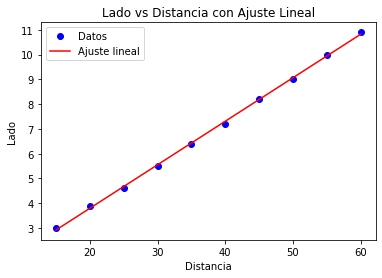

In [ ]:
# Graficar los datos con el ajuste lineal
plt.plot(df['distancia'], df['lado'], 'bo', label='Datos')
plt.plot(df['distancia'], slope*df['distancia']+intercept, 'r-', label='Ajuste lineal')
plt.xlabel('Distancia')
plt.ylabel('Lado')
plt.title('Lado vs Distancia con Ajuste Lineal')
plt.legend()
plt.show()

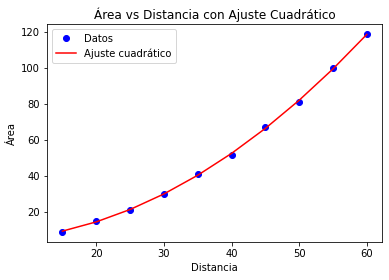

In [ ]:
# Graficar los datos y el ajuste cuadrático
plt.plot(df['distancia'], df['area'], 'bo', label='Datos')
plt.plot(df['distancia'], a*df['distancia']**2 + b*df['distancia'] + c, 'r-', label='Ajuste cuadrático')
plt.xlabel('Distancia')
plt.ylabel('Área')
plt.title('Área vs Distancia con Ajuste Cuadrático')
plt.legend()
plt.show()